In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.cm as cm
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import numpy as np

In [2]:
dbFiles = ['dec_1exp_pairsmix_10yrs.db',
           'very_alt3_rm5illum20_10yrs.db',
           '../baselines/baseline_1exp_pairsmix_10yrs.db',
          '../rolling_cadence/roll_mod2_sdf0.10mixed_10yrs.db']



Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['night', 'fieldRA', 'fieldDec'].
Found 2241608 visits
Running:  ['dec_1exp_pairsmix_10yr_DeltaNight_Histogram_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['night', 'fieldRA', 'fieldDec'].
Found 2203667 visits
Running:  ['very_alt3_rm5illum20_10yr_DeltaNight_Histogram_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['night', 'fieldRA', 'fieldDec'].
Fou

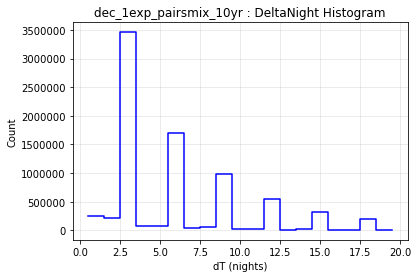

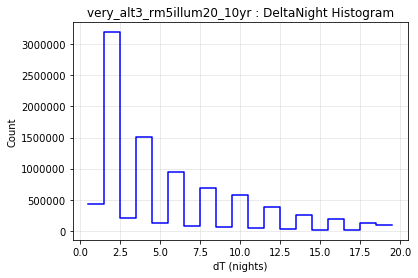

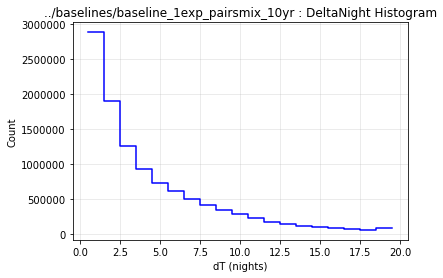

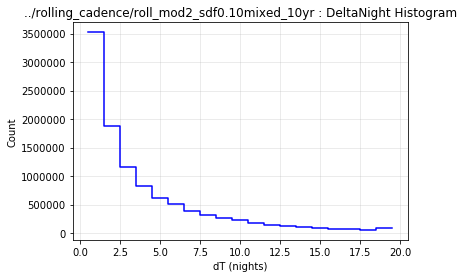

In [3]:
for dbFile in dbFiles:
    opsdb = db.OpsimDatabase(dbFile)

    nside=64
    bundleList = []
    slicer = slicers.HealpixSlicer(nside=nside)
    sql=''
    bins = np.arange(1, 20.5, 1)
    metric = metrics.NightgapsMetric(bins=bins, nightCol='night', metricName='DeltaNight Histogram')
    plotDict = {'bins': bins, 'xlabel': 'dT (nights)'}
    plotFunc = plots.SummaryHistogram()
    bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                             plotFuncs=[plotFunc], runName=dbFile[:-4])
    bundleList.append(bundle)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir='temp', resultsDb=None)
    group.runAll()
    group.plotAll(closefigs=False)